<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/classification-modeling-Titanic/blob/main/Mod_4_Titanic_Part_2_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1OhL-lseBrsHbzX33VEzRQuRTYuQXHu5s

Data taken from - https://www.kaggle.com/c/titanic/data

Part 1: https://colab.research.google.com/drive/1alhR1osGKoX7YIvuWhXdu1Gcpa0RPhid#scrollTo=9HWrWlpE3gFQ

### Import modules and data files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_merged = pd.read_csv('df_merged.csv')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1309 non-null   int64  
 1   Survived           891 non-null    float64
 2   Pclass             1309 non-null   int64  
 3   Name               1309 non-null   object 
 4   Sex                1309 non-null   object 
 5   Age                1309 non-null   float64
 6   SibSp              1309 non-null   int64  
 7   Parch              1309 non-null   int64  
 8   Ticket             1309 non-null   object 
 9   Fare               1309 non-null   float64
 10  Embarked           1309 non-null   object 
 11  TestYes            1309 non-null   int64  
 12  Ticket_Number      1309 non-null   int64  
 13  Ticket_Group       1309 non-null   object 
 14  Title              1309 non-null   object 
 15  Siblings           1309 non-null   int64  
 16  Spouse             1309 

### Split Train and Test data

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged[df_merged['TestYes'] == 0]
df_test = df_merged[df_merged['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    float64
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           891 non-null    object 
 11  Ticket_Number      891 non-null    int64  
 12  Ticket_Group       891 non-null    object 
 13  Title              891 non-null    object 
 14  Siblings           891 non-null    int64  
 15  Spouse             891 non-null    int64  
 16  Parents            891 non-null

### Logistic Regression Models

In [ ]:
feature_cols = ['Pclass', 'Age', 'Embarked', 'Sex', 'Siblings', 'Children', 'Parents']
# Prepare X and y
X_train = df_train[feature_cols]
y_train = df_train['Survived']

# One-hot encode
X_train = pd.get_dummies(X_train, columns=['Embarked', 'Sex'], drop_first=True)

# Add constant
X_train_sm = sm.add_constant(X_train)

# Ensure all columns in X_train_sm and y_train are numeric
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

# Fit logistic regression
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# View summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.437194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 May 2025   Pseudo R-squ.:                  0.3435
Time:                        20:58:27   Log-Likelihood:                -389.54
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.487e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8837      0.506      9.651      0.000       3.892       5.875
Pclass        -1.0808      0.

In [ ]:
# Predict probabilities on the training data
y_pred_probs = result.predict(X_train_sm)

# Convert probabilities to 0/1 predictions
y_pred_train = (y_pred_probs >= 0.5).astype(int)

accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on training data: {accuracy:.4f}")

# Display a confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix:")
print(cm)

# Display a classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))


Accuracy on training data: 0.8092

Confusion Matrix:
[[481  68]
 [102 240]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.78      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



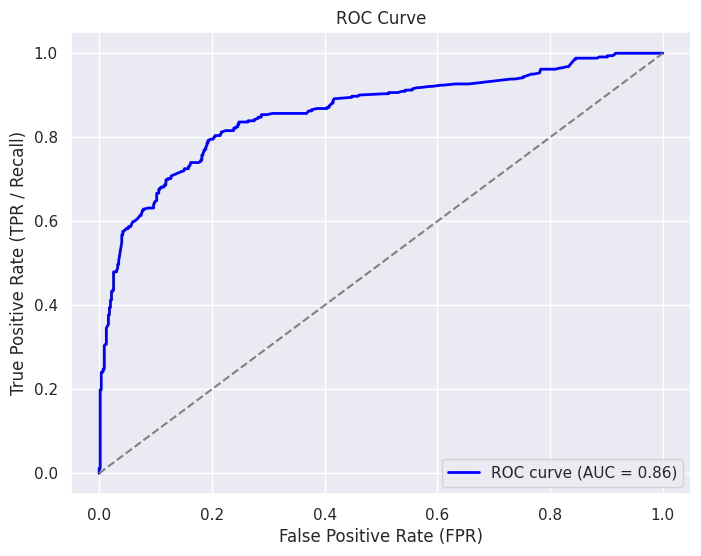

In [ ]:
# Get predicted probabilities
y_pred_probs = result.predict(X_train_sm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

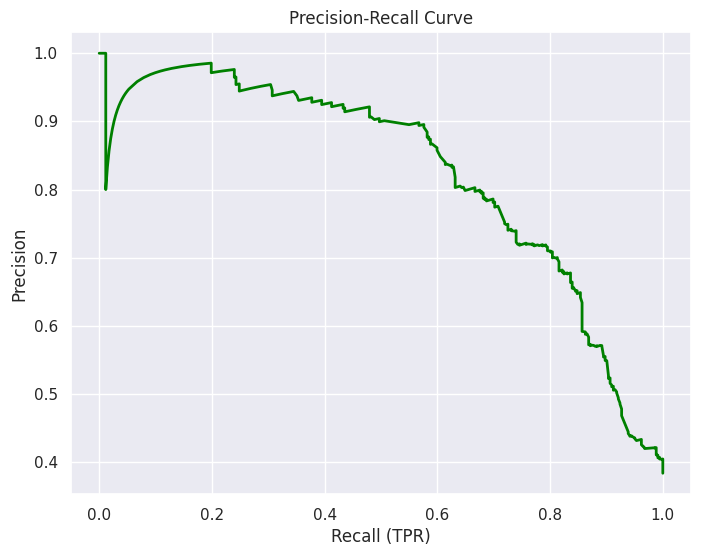

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_pred_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Prepare X_test
X_test = df_test[feature_cols]

# Step 2: One-hot encode categorical features
X_test = pd.get_dummies(X_test, columns=['Embarked', 'Sex'], drop_first=True)

# Step 3: Reindex to match X_train columns (before adding constant!)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Add constant manually
X_test_sm = sm.add_constant(X_test)

# Step 5: Ensure numeric
X_test_sm = X_test_sm.astype(float)

# Step 6: Predict
y_pred_probs_test = result.predict(X_test_sm)

# Step 7: Threshold to 0/1
y_pred_test = (y_pred_probs_test >= 0.5).astype(int)

# Step 8: Add prediction back to df_test
df_test['Survived_Predicted'] = y_pred_test


In [ ]:
# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_Predicted']].to_csv('logit1_predictions.csv', index=False)

### QDA Model

In [ ]:
# 1. Define features
feature_cols = ['Pclass', 'Age', 'Embarked', 'Sex', 'Siblings', 'Children', 'Parents']

# 2. Prepare X_train and y_train
X_train = df_train[feature_cols]
y_train = df_train['Survived']

# 3. One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=['Embarked', 'Sex'], drop_first=True)

# 4. Ensure everything is numeric (you probably already are, but good practice)
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# 5. Create and fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# 6. Predict on training data
y_pred_train = qda.predict(X_train)

# 7. Evaluate model
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.8182

Confusion Matrix:
[[469  80]
 [ 82 260]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       549
         1.0       0.76      0.76      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



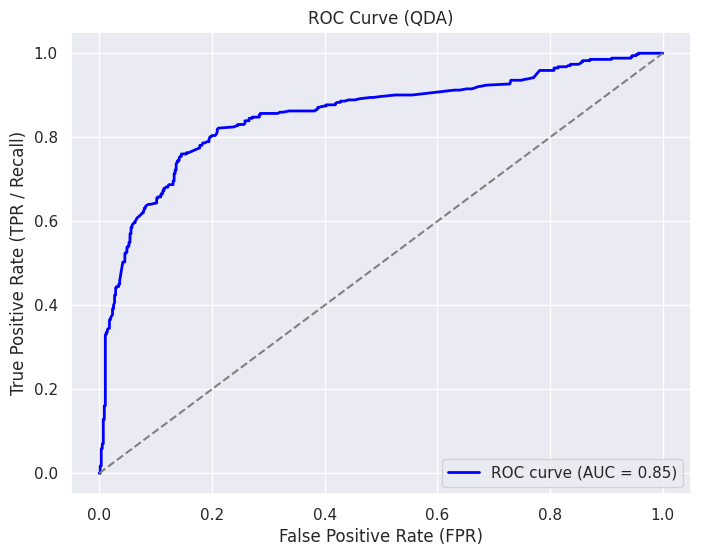

In [ ]:
# Get predicted probabilities
y_pred_probs_train = qda.predict_proba(X_train)[:, 1]  # probability of class 1 (Survived)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs_train)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve (QDA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

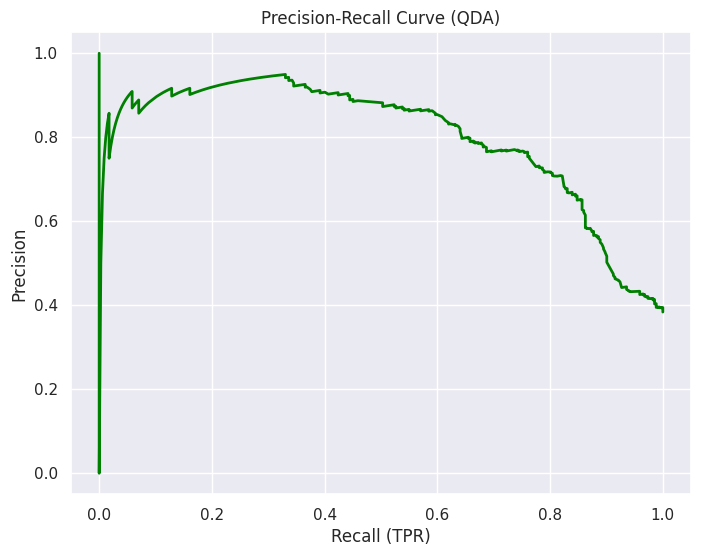

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_pred_probs_train)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (QDA)')
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Prepare X_test
X_test = df_test[feature_cols]

# Step 2: One-hot encode categorical features
X_test = pd.get_dummies(X_test, columns=['Embarked', 'Sex'], drop_first=True)

# Step 3: Reindex to match X_train columns (NO constant yet!)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Ensure numeric
X_test = X_test.astype(float)

# Step 5: Predict 0/1 directly using QDA
y_pred_test = qda.predict(X_test)

# Step 6: Add predictions back to df_test
df_test['Survived_Predicted_QDA'] = y_pred_test

In [ ]:
# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_Predicted_QDA']].to_csv('QDA1_predictions.csv', index=False)

### KNN Model

In [ ]:
# 1. Define feature columns
feature_cols = ['Pclass', 'Age', 'Embarked', 'Sex', 'Siblings', 'Children', 'Parents']

# 2. Prepare X_train and y_train
X_train = df_train[feature_cols]
y_train = df_train['Survived']

# 3. One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=['Embarked', 'Sex'], drop_first=True)

# 4. Ensure numeric
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# 5. Create and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k=5,7,9 etc.
knn.fit(X_train, y_train)

# 6. Predict on training data
y_pred_train = knn.predict(X_train)

# 7. Evaluate model
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.7957

Confusion Matrix:
[[446 103]
 [ 79 263]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       549
         1.0       0.72      0.77      0.74       342

    accuracy                           0.80       891
   macro avg       0.78      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



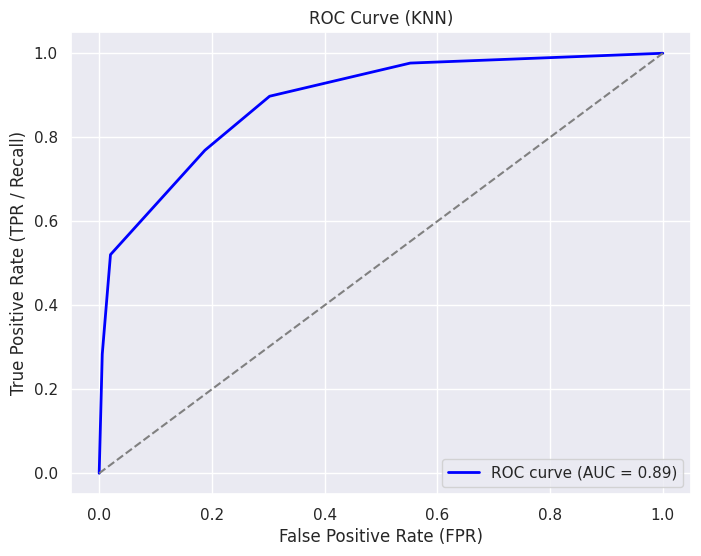

In [ ]:
# Get predicted probabilities
y_pred_probs_train = knn.predict_proba(X_train)[:, 1]  # Probability of Survived = 1

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs_train)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

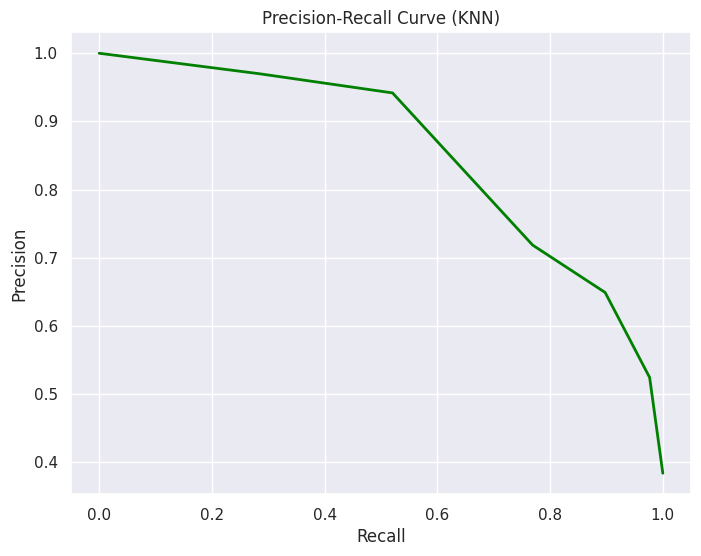

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_pred_probs_train)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Prepare X_test
X_test = df_test[feature_cols]

# Step 2: One-hot encode
X_test = pd.get_dummies(X_test, columns=['Embarked', 'Sex'], drop_first=True)

# Step 3: Reindex to match X_train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Ensure numeric
X_test = X_test.astype(float)

# Step 5: Predict
y_pred_test = knn.predict(X_test)

# Step 6: Add predictions back to df_test
df_test['Survived_Predicted_KNN'] = y_pred_test

In [ ]:
# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_Predicted_KNN']].to_csv('KNN1_predictions.csv', index=False)